In [228]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, chisquare

LOW = 0
UP = np.pi
NUM_GENERATIONS = 10_000
INTERVAL_STEP = 0.05
TRESHPLD_CHISQUARE = 5

def intensivity(t : np.float64):
    return np.sin(t)
# end def

def helper_intensivity(t : np.float64 = 0.0):
    return 1
# end def

In [229]:
def get_single_t_steps():
    list_of_steps = []

    def recursive_time_steps(prev_t : np.float64):
        new_t = prev_t - np.log(random.uniform(0, 1) / helper_intensivity())
        if new_t > UP:
            return 
        else:
            list_of_steps.append(new_t)
            recursive_time_steps(new_t)
        # end if
    # end def

    recursive_time_steps(LOW)
    return list_of_steps


In [230]:
list_of_intervals = []
for _ in range(NUM_GENERATIONS):
    list_of_intervals.append(get_single_t_steps())
# end for

In [231]:
new_flow = []
merged_flow = []

for interval in list_of_intervals:
    thinned_out_list = []
    for t in interval:
        y_i = random.uniform(LOW, helper_intensivity(t))
        lambda_i = intensivity(t)
        if y_i <= lambda_i:
            thinned_out_list.append(t)
        # end if
    # end for
    new_flow.append(thinned_out_list)
    merged_flow.extend(thinned_out_list)
# end for

# new_flow

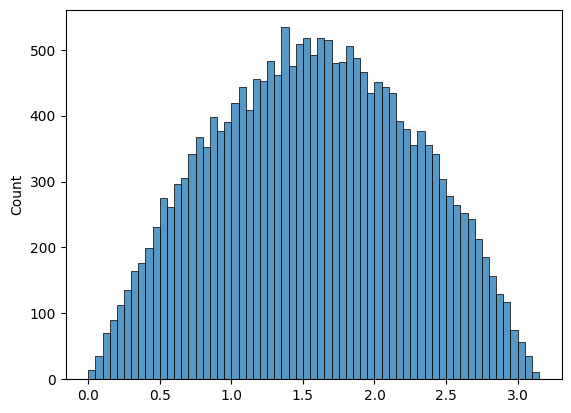

In [232]:
intervals = np.arange(0, np.pi + INTERVAL_STEP, INTERVAL_STEP)

hist_data = np.histogram(np.array(merged_flow), bins = intervals)

data = sns.histplot(np.array(merged_flow), bins = intervals).get_lines()

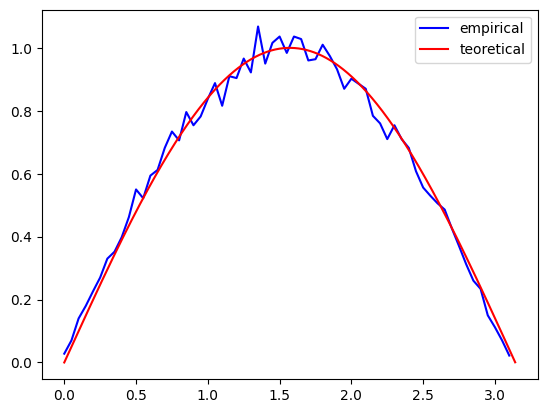

In [233]:
histogram_conuts = hist_data[0]

normalized_hist_data = hist_data[0] / (NUM_GENERATIONS * INTERVAL_STEP)
normalized_hist_data
plt.plot(intervals[:-1], normalized_hist_data, c='b', label = 'empirical')
plt.plot(np.arange(LOW, UP, 0.001), intensivity(np.arange(LOW, UP, 0.001)), c='r', label = 'teoretical')
plt.legend()
plt.show()

In [234]:
max_idx = histogram_conuts.argmax()

def get_correlation(histogram_conuts : np.ndarray, i : np.int64, j : np.int64):
    if i != j:
        return histogram_conuts[i] * histogram_conuts[j] / (INTERVAL_STEP ** 2)
    else:
        return histogram_conuts[i] * (histogram_conuts[j] - 1) / (INTERVAL_STEP ** 2)
    # end if
# end def 

corrlation_funcs = []

for i in range(NUM_GENERATIONS):
    corrlation_list = []

    curr_hist_data = np.histogram(np.array(new_flow[i]), bins = intervals)[0]

    for j in range(curr_hist_data.shape[0]):
        corrlation_list.append(get_correlation(curr_hist_data, max_idx, j))
    # end for
    corrlation_funcs.append(corrlation_list)
# end for

np.array(corrlation_funcs)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
sum_of_rows = np.array(corrlation_funcs).sum(axis = 0) / NUM_GENERATIONS
sum_of_rows

array([0.08, 0.  , 0.08, 0.2 , 0.52, 0.44, 0.4 , 0.36, 0.52, 0.4 , 0.64,
       0.76, 0.44, 0.44, 0.8 , 0.88, 0.92, 0.92, 0.44, 0.96, 0.92, 0.76,
       1.08, 0.6 , 0.88, 1.2 , 1.04, 1.04, 1.12, 0.84, 0.96, 1.2 , 1.16,
       0.92, 1.08, 0.92, 0.96, 1.12, 1.08, 1.4 , 0.84, 0.6 , 0.88, 0.8 ,
       0.52, 1.08, 0.84, 0.84, 0.84, 0.84, 0.56, 0.32, 0.48, 0.52, 0.36,
       0.36, 0.56, 0.24, 0.12, 0.28, 0.04, 0.12, 0.  ])

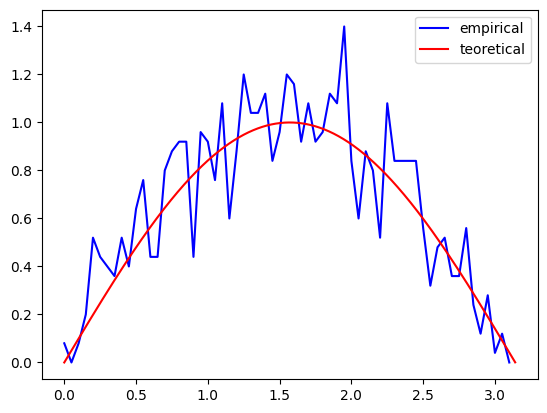

In [236]:
plt.plot(intervals[:-1], sum_of_rows, c='b', label = 'empirical')
plt.plot(np.arange(LOW, UP, 0.001), intensivity(np.arange(LOW, UP, 0.001)), c='r', label = 'teoretical')
plt.legend()
plt.show()

In [237]:
event_counts = [len(events) for events in new_flow]
max_events = max(event_counts)
bins = np.arange(0, max_events + 2)

hist_counts, _ = np.histogram(event_counts, bins = bins)
probabilities = hist_counts / NUM_GENERATIONS

probabilities

array([1.398e-01, 2.675e-01, 2.675e-01, 1.816e-01, 8.850e-02, 3.880e-02,
       1.210e-02, 3.700e-03, 3.000e-04, 2.000e-04])

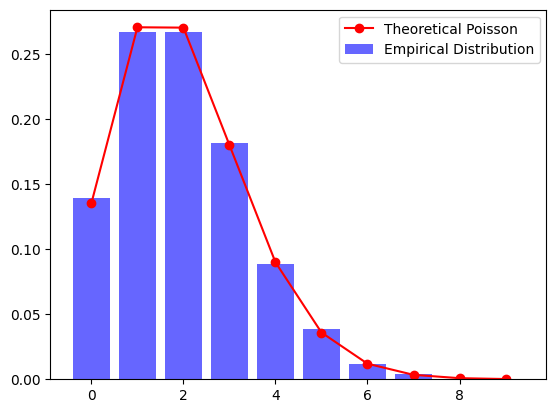

In [238]:
plt.bar(bins[:-1], probabilities, width = 0.8, alpha = 0.6, color = 'b', label = 'Empirical Distribution')
lambda_theoretical = np.trapz(intensivity(np.linspace(LOW, UP, 1000)), dx = (UP - LOW) / 1000)
poisson_probs = poisson.pmf(bins[:-1], lambda_theoretical)
plt.plot(bins[:-1], poisson_probs, 'r', marker = 'o', label = f'Theoretical Poisson')

plt.legend()
plt.show()

In [239]:
print(hist_counts)
print(poisson_probs)

[1398 2675 2675 1816  885  388  121   37    3    2]
[1.35606448e-01 2.70941460e-01 2.70670295e-01 1.80266268e-01
 9.00429267e-02 3.59811238e-02 1.19817044e-02 3.41991794e-03
 8.54123802e-04 1.89615328e-04]


In [240]:
poisson_values = poisson_probs * NUM_GENERATIONS

first_less_than = list(hist_counts > TRESHPLD_CHISQUARE)

new_poisson_values = list(poisson_values[:first_less_than.index(False)])
new_empirical_values = list(hist_counts[:first_less_than.index(False)])

sum_of_last_colums_empirical = 0
sum_of_last_colums_teoretical = 0

try:
    if first_less_than.index(False) != len(poisson_values) - 1:
        for i in range(first_less_than.index(False), len(poisson_values)):
            sum_of_last_colums_empirical += hist_counts[i]
            sum_of_last_colums_teoretical += poisson_values[i]
        # end for
        new_poisson_values.append(sum_of_last_colums_teoretical)
        new_empirical_values.append(sum_of_last_colums_teoretical)
    else:
        new_poisson_values[-1] += poisson_values[-1]
        new_empirical_values[-1] += hist_counts[-1]
    # end if

    if new_poisson_values[-1] < TRESHPLD_CHISQUARE or new_empirical_values[-1] < TRESHPLD_CHISQUARE:
        new_empirical_values[-2] += new_empirical_values[-1]
        new_poisson_values[-2] += new_poisson_values[-1]
        new_poisson_values = new_poisson_values[:-1]
        new_empirical_values = new_empirical_values[:-1]
    # end if
except ValueError:
    pass
# end try

new_poisson_values = np.array(list(map(round, new_poisson_values)))
new_empirical_values = np.array(list(map(round, new_empirical_values)))

if sum(new_poisson_values) > sum(new_empirical_values):
    new_empirical_values[new_empirical_values.argmax()] += sum(new_poisson_values) - sum(new_empirical_values)
else:
    new_poisson_values[new_poisson_values.argmax()] += sum(new_empirical_values) - sum(new_poisson_values)
# end if

print(new_poisson_values)
print(new_empirical_values)

[1356 2715 2707 1803  900  360  120   34   10]
[1398 2675 2675 1816  885  388  121   37   10]


In [241]:
chisquare_statistic, p_value = chisquare(new_empirical_values, new_poisson_values)
print(f'chisquare_statistic={chisquare_statistic:2f}')
print(f'p_value={p_value:2f}')
print(f'approve={p_value > 0.05}')

chisquare_statistic=5.063032
p_value=0.750818
approve=True
